In [82]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [83]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [84]:
len(words)

32033

In [85]:
chars = [chr(i) for i in range(97, 97 + 26)]
stoi = {s: i + 1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [86]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [87]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [88]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [89]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [90]:
for p in parameters:
    p.requires_grad = True

In [91]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre # exponentially stepped
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [92]:
lrs_t = []
lre_t = []
lossi = []

for i in range(1000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    # forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = lrs[i]
    # update
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    lrs_t.append(lrs[i])
    lre_t.append(lre[i])
    lossi.append(loss.item())

18.179819107055664
16.61636734008789
15.73616886138916
21.30518341064453
20.263317108154297
19.63642120361328
18.51967430114746
20.85289764404297
20.24849510192871
20.73557472229004
18.232074737548828
22.496788024902344
16.327274322509766
18.052249908447266
20.238866806030273
15.611042022705078
16.00859260559082
21.718687057495117
16.340620040893555
20.56096839904785
22.177471160888672
15.4125337600708
14.92567253112793
18.54967498779297
19.874849319458008
19.351449966430664
17.42502784729004
19.575414657592773
20.000446319580078
15.958818435668945
17.309749603271484
20.018003463745117
18.146787643432617
18.936174392700195
21.035703659057617
19.037256240844727
19.39718246459961
17.658767700195312
18.589046478271484
17.83917236328125
19.223758697509766
18.945858001708984
17.387727737426758
19.67315101623535
18.561227798461914
16.932767868041992
20.648334503173828
19.67101287841797
20.16423988342285
17.68017578125
15.233892440795898
17.539701461791992
17.29334259033203
18.53847312927246


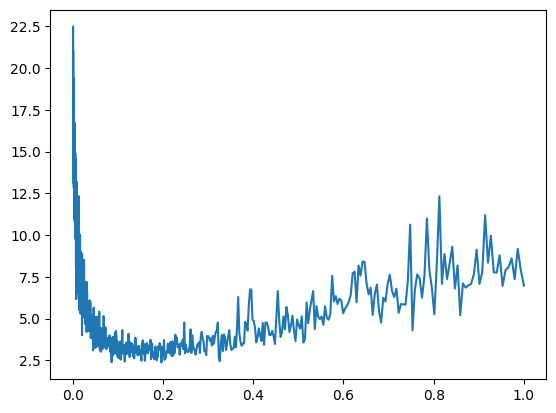

In [93]:
plt.plot(lrs_t, lossi)

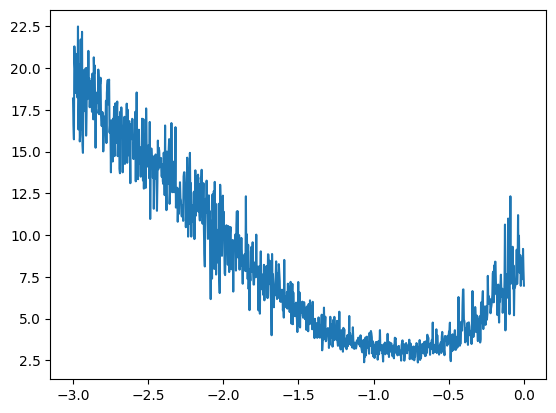

In [94]:
plt.plot(lre_t, lossi)

In [ ]:
# from above 2 graphs you can see that loss is minimum when lr = 0.1,
# using a larger learning rate results in loss to explode
# so we are finally confident that lr = 0.1 is a good learning rate